# Zillow Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
import os
from env import host, user, password
import acquire
import prepare

### Acquire

In [2]:
df = acquire.new_zillow_data()
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,poolcnt,regionidzip,yearbuilt,latitude,longitude,taxvaluedollarcnt,garagetotalsqft,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,NaN,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01
1,1.0,2.0,1465.0,6111.0,12647.0,NaN,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,NaN,3101.0,396551.0,2017-01-01
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,NaN,3101.0,47019.0,2017-01-01


In [3]:
df= df.rename(columns = {'bathroomcnt' : 'bathrooms',
                     'bedroomcnt' : 'bedrooms',
                     'calculatedfinishedsquarefeet' : 'total_living_area',
                     'lotsizesquarefeet' : 'lot_size',
                     'poolcnt' : 'pools',
                     'yearbuilt' : 'year_built',
                     'taxvaluedollarcnt' : 'tax_value',
                     'garagetotalsqft' : 'garage_area',
                    'regionidzip' : 'zip_code',
                         
                     })

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          52441 non-null  float64
 1   bedrooms           52441 non-null  float64
 2   total_living_area  52359 non-null  float64
 3   fips               52441 non-null  float64
 4   lot_size           52072 non-null  float64
 5   pools              11096 non-null  float64
 6   zip_code           52415 non-null  float64
 7   year_built         52325 non-null  float64
 8   latitude           52441 non-null  float64
 9   longitude          52441 non-null  float64
 10  tax_value          52440 non-null  float64
 11  garage_area        18015 non-null  float64
 12  regionidcounty     52441 non-null  float64
 13  regionidcity       51404 non-null  float64
 14  transactiondate    52441 non-null  object 
dtypes: float64(14), object(1)
memory usage: 6.0+ MB


In [5]:
df.regionidcounty.unique()

array([1286., 2061., 3101.])

In [6]:
df.shape

(52441, 15)

### Acquire Takeways

- Not Null Count is different for each column, we will make them same by deleting rows.
- For Houses with NaN for pools, we assume it has no pool and make it 0.
- For Houses with Nan for garage_area, we will assume they have no garge, so make its garage_area 0.


### Prepare

Details on wrangle_zillow on prepare.py,

In [7]:
df = prepare.wrangle_zillow(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50906 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          50906 non-null  float64
 1   bedrooms           50906 non-null  float64
 2   total_living_area  50906 non-null  float64
 3   fips               50906 non-null  float64
 4   lot_size           50906 non-null  float64
 5   pools              50906 non-null  float64
 6   zip_code           50906 non-null  float64
 7   year_built         50906 non-null  float64
 8   latitude           50906 non-null  float64
 9   longitude          50906 non-null  float64
 10  tax_value          50906 non-null  float64
 11  garage_area        50906 non-null  float64
 12  regionidcounty     50906 non-null  float64
 13  regionidcity       50906 non-null  float64
 14  transactiondate    50906 non-null  object 
dtypes: float64(14), object(1)
memory usage: 6.2+ MB


In [9]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,0.0,3101.0,396551.0,2017-01-01
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,0.0,3101.0,47019.0,2017-01-01


In [10]:
df.shape

(50906, 15)

### Visualization

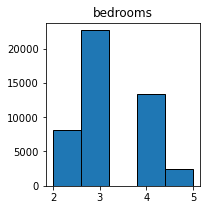

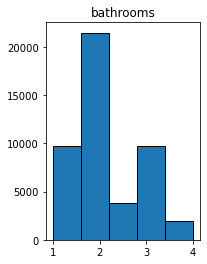

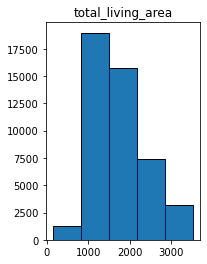

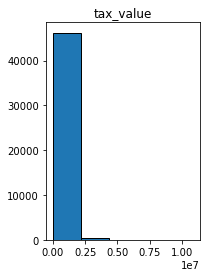

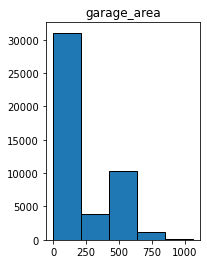

<Figure size 1152x288 with 0 Axes>

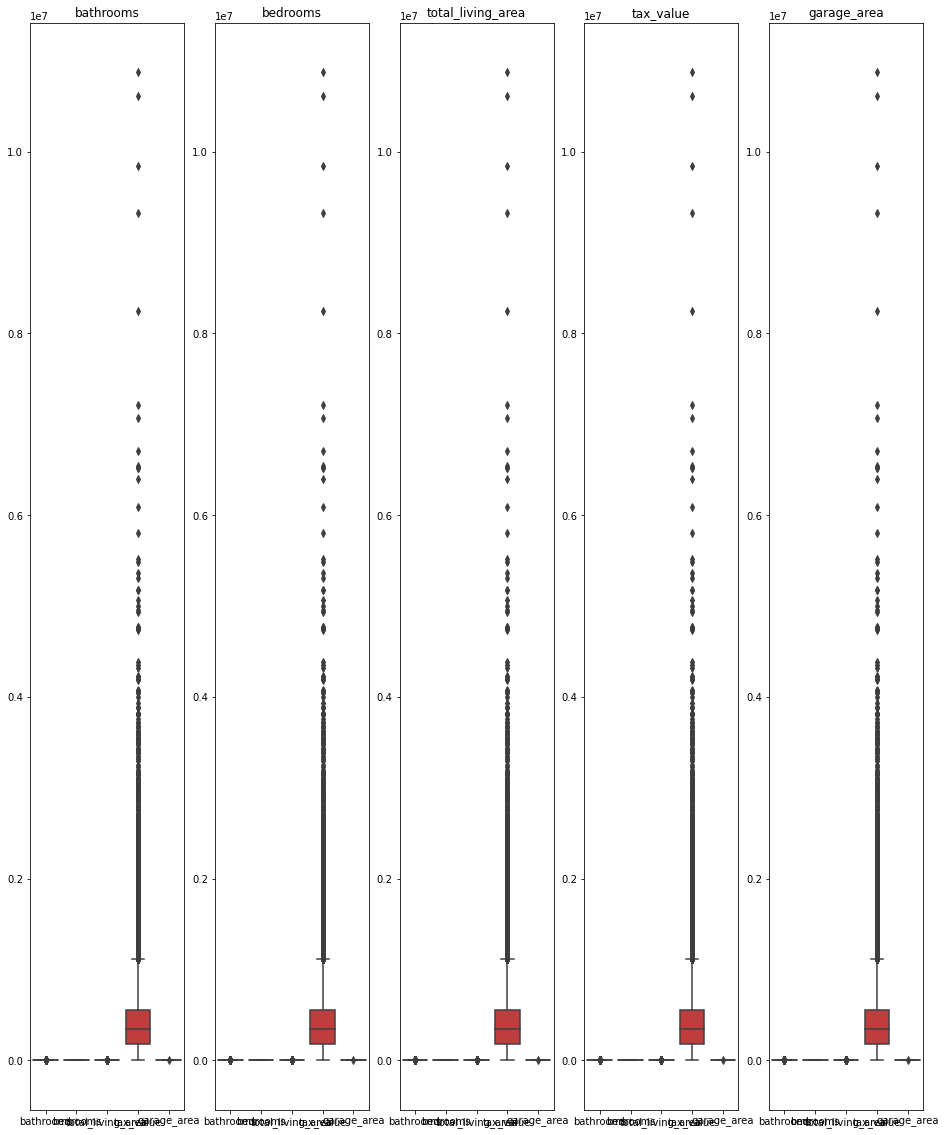

In [11]:
# Removing Possible outliers from dataframes and showing histrogram and boxplot
df = prepare.prepare_zillow(df)

In [12]:
df.shape

(46553, 15)

In [24]:
df['age'] = 2021- df.year_built

In [26]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01,23.0
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01,54.0
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01,59.0
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,0.0,3101.0,396551.0,2017-01-01,51.0
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,0.0,3101.0,47019.0,2017-01-01,71.0


In [27]:
# df = prepare.wrangle_zillow_split(df)
df.shape

(46553, 16)

In [28]:
# splitting df into train, test, validate
train, test, validate = prepare.wrangle_zillow_split(df)

In [29]:
train.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
3113,2.0,3.0,1101.0,6111.0,6000.0,0.0,97113.0,1956.0,34338603.0,-119076653.0,333000.0,441.0,2061.0,26965.0,2017-01-23,65.0
23583,1.0,3.0,1129.0,6059.0,6000.0,0.0,97003.0,1920.0,33749797.0,-117914617.0,29207.0,261.0,1286.0,47568.0,2017-05-11,101.0
6474,2.0,5.0,1968.0,6037.0,13860.0,1.0,96514.0,1928.0,34108965.0,-118090622.0,566699.0,0.0,3101.0,33837.0,2017-02-14,93.0
14036,3.0,4.0,1644.0,6059.0,5085.0,0.0,96962.0,1978.0,33653984.0,-117657362.0,244497.0,493.0,1286.0,32380.0,2017-03-28,43.0
37238,2.0,4.0,2099.0,6037.0,8454.0,0.0,97319.0,1972.0,34684135.0,-118176253.0,84250.0,0.0,3101.0,5534.0,2017-07-07,49.0


In [30]:
validate.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
9140,2.0,3.0,1826.0,6037.0,6622.0,0.0,96273.0,1963.0,34154584.0,-118017331.0,300146.0,0.0,3101.0,32923.0,2017-03-01,58.0
19528,3.0,5.0,2573.0,6111.0,14408.0,1.0,96383.0,1969.0,34209435.0,-118881200.0,517569.0,580.0,2061.0,34278.0,2017-04-24,52.0
13179,2.0,3.0,1208.0,6037.0,5277.0,0.0,96215.0,1961.0,33839301.0,-118090331.0,144786.0,0.0,3101.0,12292.0,2017-03-23,60.0
47158,2.0,3.0,1181.0,6037.0,6350.0,0.0,97317.0,1955.0,34705573.0,-118154675.0,36192.0,0.0,3101.0,5534.0,2017-08-24,66.0
34564,3.0,3.0,2480.0,6037.0,7565.0,0.0,96058.0,1952.0,34113879.0,-118463140.0,827374.0,0.0,3101.0,12447.0,2017-06-27,69.0


In [31]:
test.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
3221,1.0,2.0,887.0,6037.0,5450.0,0.0,96242.0,1950.0,33822669.0,-118111456.0,435855.0,0.0,3101.0,46298.0,2017-01-23,71.0
15568,3.0,4.0,2826.0,6059.0,5050.0,0.0,97037.0,2001.0,33925661.0,-117840806.0,613220.0,593.0,1286.0,17150.0,2017-04-04,20.0
16856,2.0,3.0,1665.0,6037.0,74764.0,0.0,96524.0,1952.0,34062822.0,-117870907.0,751400.0,0.0,3101.0,14542.0,2017-04-11,69.0
23116,2.0,3.0,1412.0,6059.0,7244.0,0.0,97023.0,1962.0,33810759.0,-117948770.0,89511.0,506.0,1286.0,16764.0,2017-05-09,59.0
42698,2.0,3.0,1446.0,6111.0,7773.0,0.0,97118.0,1961.0,34275557.0,-118747937.0,391330.0,388.0,2061.0,27110.0,2017-08-01,60.0


### Takeaways
- We can see that lot_size and tax_value has outlier but still I choose to keep them because lot size can in real varies from land to land because some house may seat in 0.20 acre and some may set on 20  to even 100 acres. While I was trying to use outliers to remove outliers from tax_value, it takes more than 20% of my data, so I choose not to use outlier on it. As it is my target variables. 
- Still a few outliers despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop these outliers.

### Exploration

In [34]:

def plot_variable_pairs(df):
    """Takes a DataFrame and all of the pairwise relationships along with the regression line for each pair"""
    sns.pairplot(df, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.9}})
    plt.show()

In [35]:
train_sub = train[['bathrooms', 'bedrooms', 'total_living_area', 'tax_value', 'lot_size', 'garage_area', 'age']]

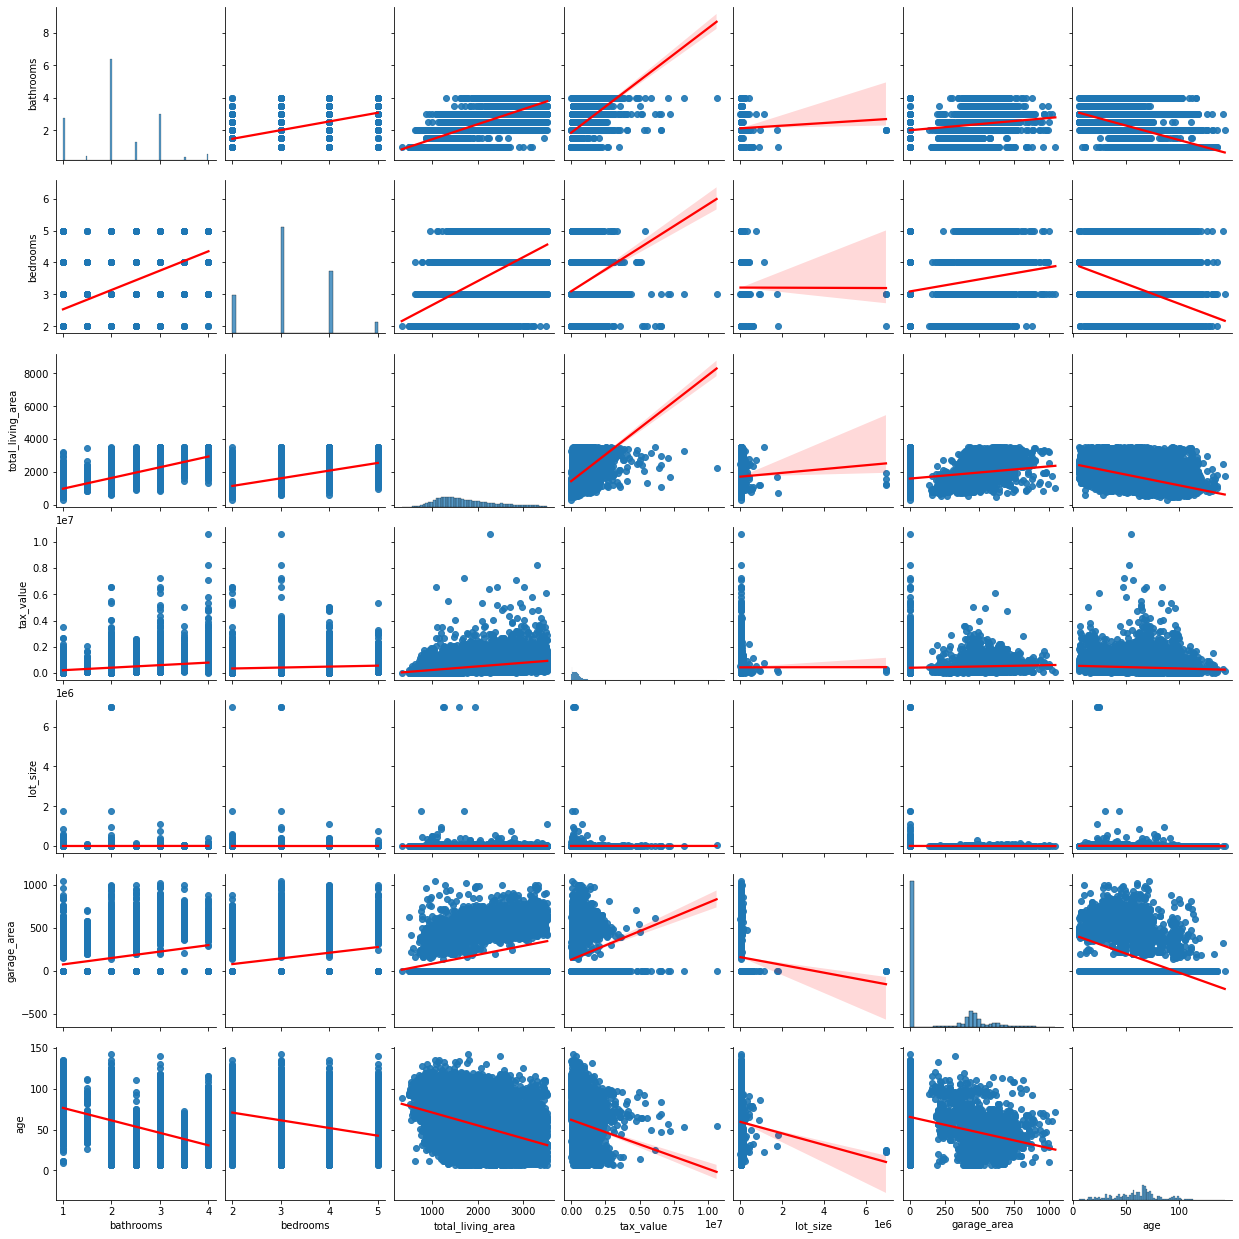

In [36]:
plot_variable_pairs(train_sub )